In [3]:
import pandas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
data = pandas.read_csv('test3.csv')

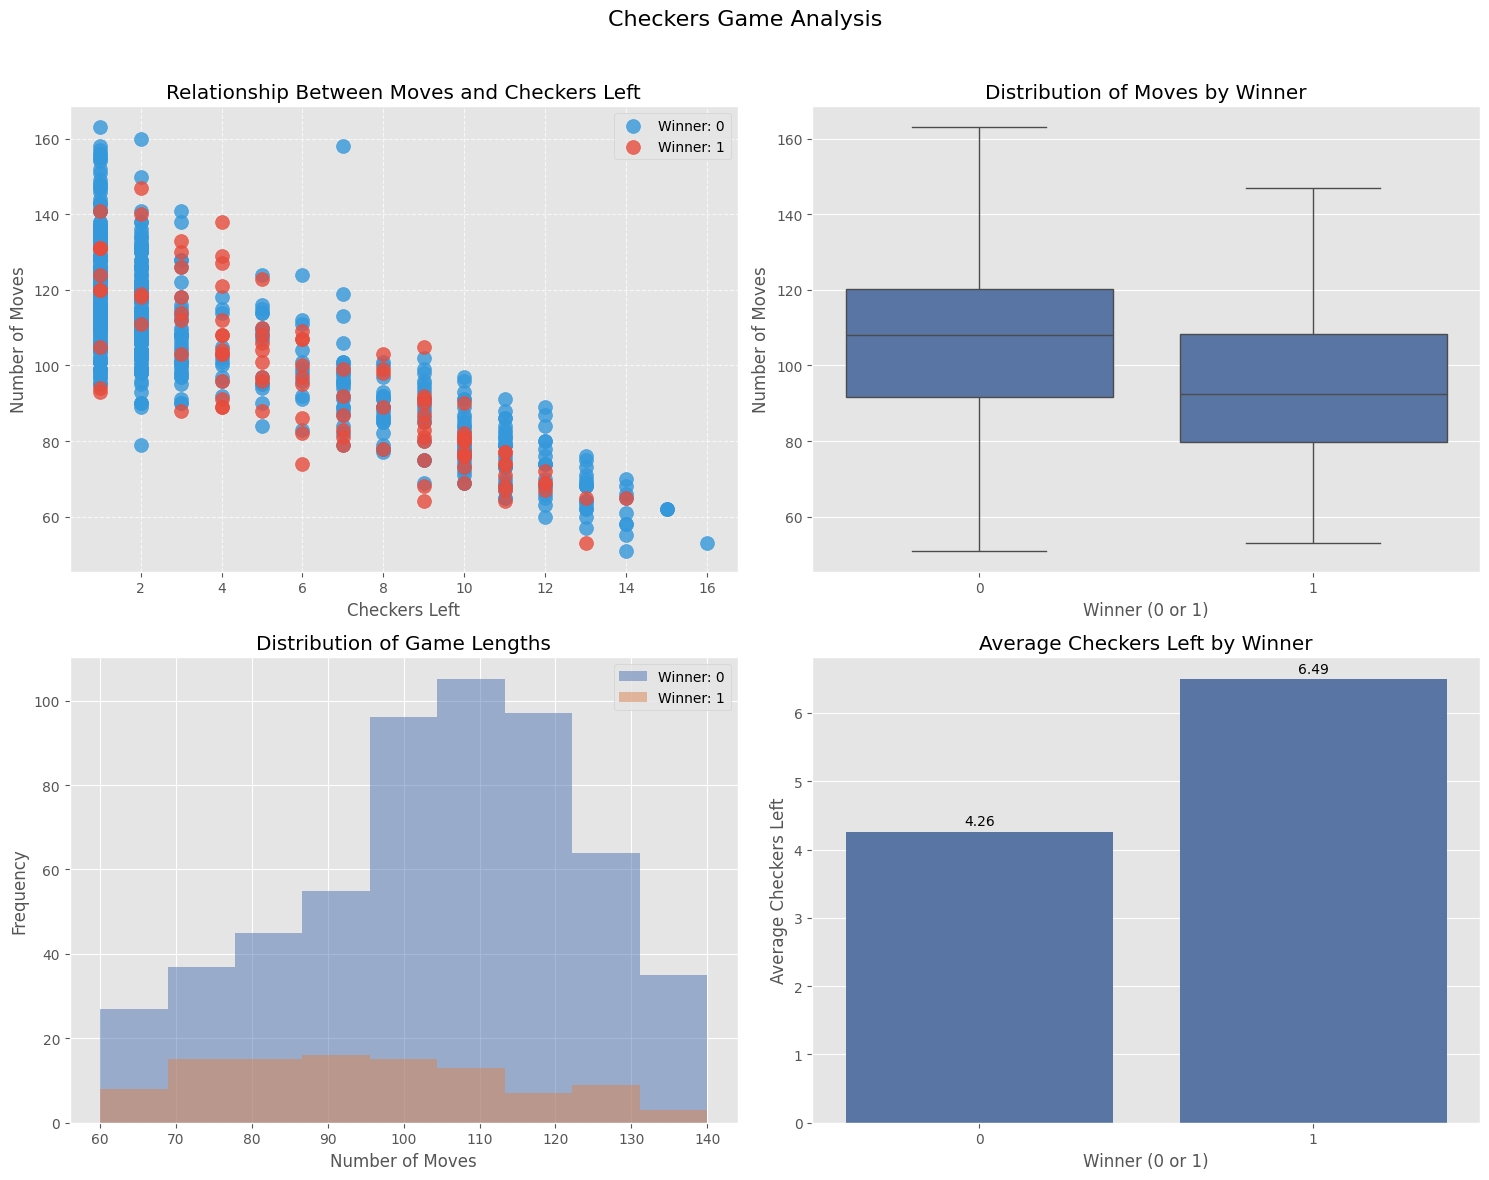

C:\Users\jaspe\AppData\Local\Temp\ipykernel_1808\3834234227.py:57: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = pd.pivot_table(


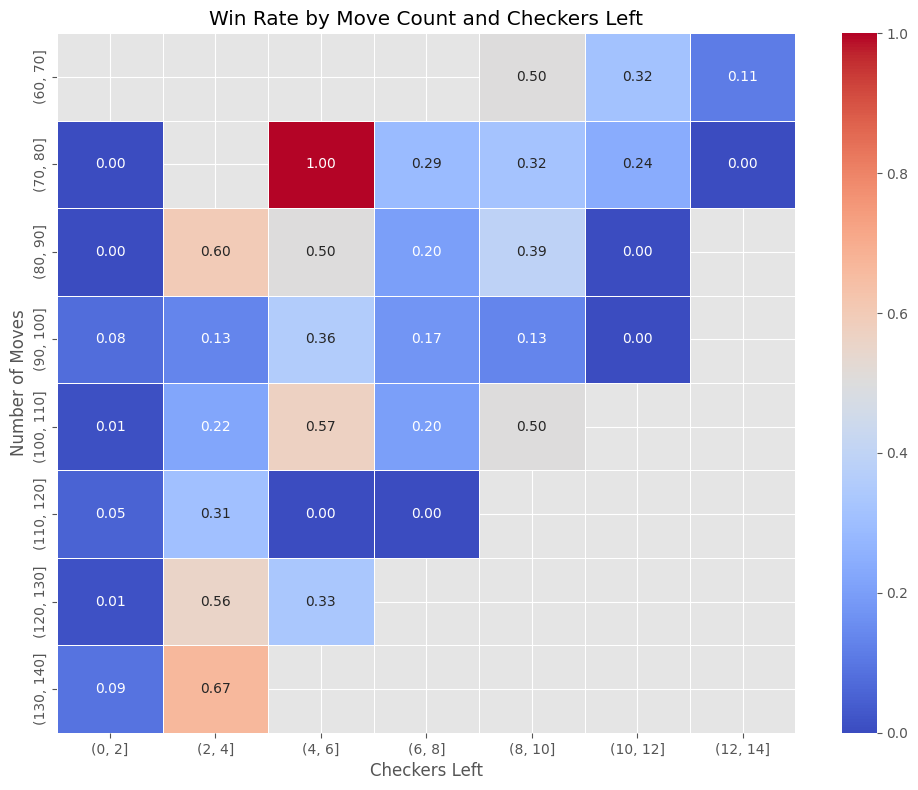

In [6]:
# Set style
plt.style.use('ggplot')
sns.set_palette("deep")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 12))
fig.suptitle('Checkers Game Analysis', fontsize=16)

# 1. Scatter plot: Moves vs Checkers left (colored by winner)
ax1 = plt.subplot(2, 2, 1)
winners = data['Winner'].unique()
colors = ['#3498db', '#e74c3c']
for i, winner in enumerate(winners):
    subset = data[data['Winner'] == winner]
    ax1.scatter(subset['Checkers_left'], subset['Moves'], 
               c=colors[i], label=f'Winner: {winner}', alpha=0.8, s=100)
ax1.set_xlabel('Checkers Left')
ax1.set_ylabel('Number of Moves')
ax1.set_title('Relationship Between Moves and Checkers Left')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Box plot: Moves by Winner
ax2 = plt.subplot(2, 2, 2)
sns.boxplot(x='Winner', y='Moves', data=data, ax=ax2)
ax2.set_title('Distribution of Moves by Winner')
ax2.set_xlabel('Winner (0 or 1)')
ax2.set_ylabel('Number of Moves')

# 3. Histogram: Distribution of moves
ax3 = plt.subplot(2, 2, 3)
bins = np.linspace(60, 140, 10)
ax3.hist(data[data['Winner'] == 0]['Moves'], bins=bins, alpha=0.5, label='Winner: 0')
ax3.hist(data[data['Winner'] == 1]['Moves'], bins=bins, alpha=0.5, label='Winner: 1')
ax3.set_xlabel('Number of Moves')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Game Lengths')
ax3.legend()

# 4. Bar plot: Average checkers left by winner
ax4 = plt.subplot(2, 2, 4)
avg_checkers = data.groupby('Winner')['Checkers_left'].mean().reset_index()
sns.barplot(x='Winner', y='Checkers_left', data=avg_checkers, ax=ax4)
ax4.set_title('Average Checkers Left by Winner')
ax4.set_xlabel('Winner (0 or 1)')
ax4.set_ylabel('Average Checkers Left')

# Add numeric values on top of bars
for i, value in enumerate(avg_checkers['Checkers_left']):
    ax4.text(i, value + 0.1, f'{value:.2f}', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

# 5. Additional visualization: Heatmap of wins based on checkers left and moves
plt.figure(figsize=(10, 8))
pivot_data = pd.pivot_table(
    data,
    values='Winner',
    index=pd.cut(data['Moves'], bins=range(60, 150, 10)),
    columns=pd.cut(data['Checkers_left'], bins=range(0, 15, 2)),
    aggfunc='mean'
)

sns.heatmap(pivot_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Win Rate by Move Count and Checkers Left')
plt.xlabel('Checkers Left')
plt.ylabel('Number of Moves')
plt.tight_layout()
plt.show()